# HOME CREDIT PROJECT by Mellia

## Import the Relevant Libraries

In [1]:
# library for pre processing dataframe

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# library for visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
# for creating the default size of frame

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [4]:
import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

## Import Dataset

In [5]:
df = pd.read_csv('application_train.csv')
df.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
104869,221693,0,Cash loans,F,N,Y,0,180000.0,1340419.5,53289.0,1233000.0,Family,Working,Higher education,Married,House / apartment,0.006296,-19197,-3058,-7549.0,-2485,NaN,1,1,0,1,0,0,Sales staff,2.0,3,3,MONDAY,17,0,0,0,0,0,0,Trade: type 7,NaN,0.500128,0.728141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-294.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
183101,312222,0,Cash loans,F,Y,N,0,67500.0,634482.0,20596.5,454500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.007330,-15983,-3485,-1764.0,-1770,64.0,1,1,0,1,0,0,Cooking staff,2.0,2,2,THURSDAY,11,0,0,0,1,1,0,Self-employed,0.501793,0.176441,0.342529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1449.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
284665,429684,0,Cash loans,F,N,Y,0,171000.0,463500.0,22297.5,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,Office apartment,0.031329,-19603,-1595,-7960.0,-3144,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Industry: type 1,NaN,0.595728,0.540654,0.1835,0.0913,0.9891,0.8504,0.0355,0.2,0.1724,0.3333,0.375,0.0256,0.1496,0.1725,0.0,0.0000,0.1870,0.0947,0.9891,0.8563,0.0358,0.2014,0.1724,0.3333,0.375,0.0262,0.1635,0.1797,0.0,0.0000,0.1853,0.0913,0.9891,0.8524,0.0357,0.2,0.1724,0.3333,0.375,0.0261,0.1522,0.1756,0.0,0.0000,reg oper account,block of flats,0.1357,Panel,No,0.0,0.0,0.0,0.0,-926.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
254836,394882,1,C

## Descriptive Information and Data Validation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
df.shape

(307511, 122)

In [9]:
# Drop column with percentage of missing values > 50 %

def drop_columns(df):
    missing_percent = (df.isna().sum()/df.shape[0])*100
    col_dropped = missing_percent[missing_percent > 50].index
    df= df.drop(columns= col_dropped)
    return df 

df= drop_columns(df)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [11]:
# Make the following columns become positive 

df['DAYS_BIRTH']= df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'].abs()
df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].abs()
df['DAYS_ID_PUBLISH']= df['DAYS_ID_PUBLISH'].abs()
df['DAYS_LAST_PHONE_CHANGE']= df['DAYS_LAST_PHONE_CHANGE'].abs()

In [12]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [13]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [14]:
# Replace 'XNA' values in 'CODE_GENDER' column with 'F' (majority)
# Replace 'Unknown' values in 'NAME_FAMILY_STATUS' column with 'Married' (majority)

df['CODE_GENDER']= df['CODE_GENDER'].replace('XNA', 'F')
df['NAME_FAMILY_STATUS']= df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

## EDA

### Contract Type by Gender

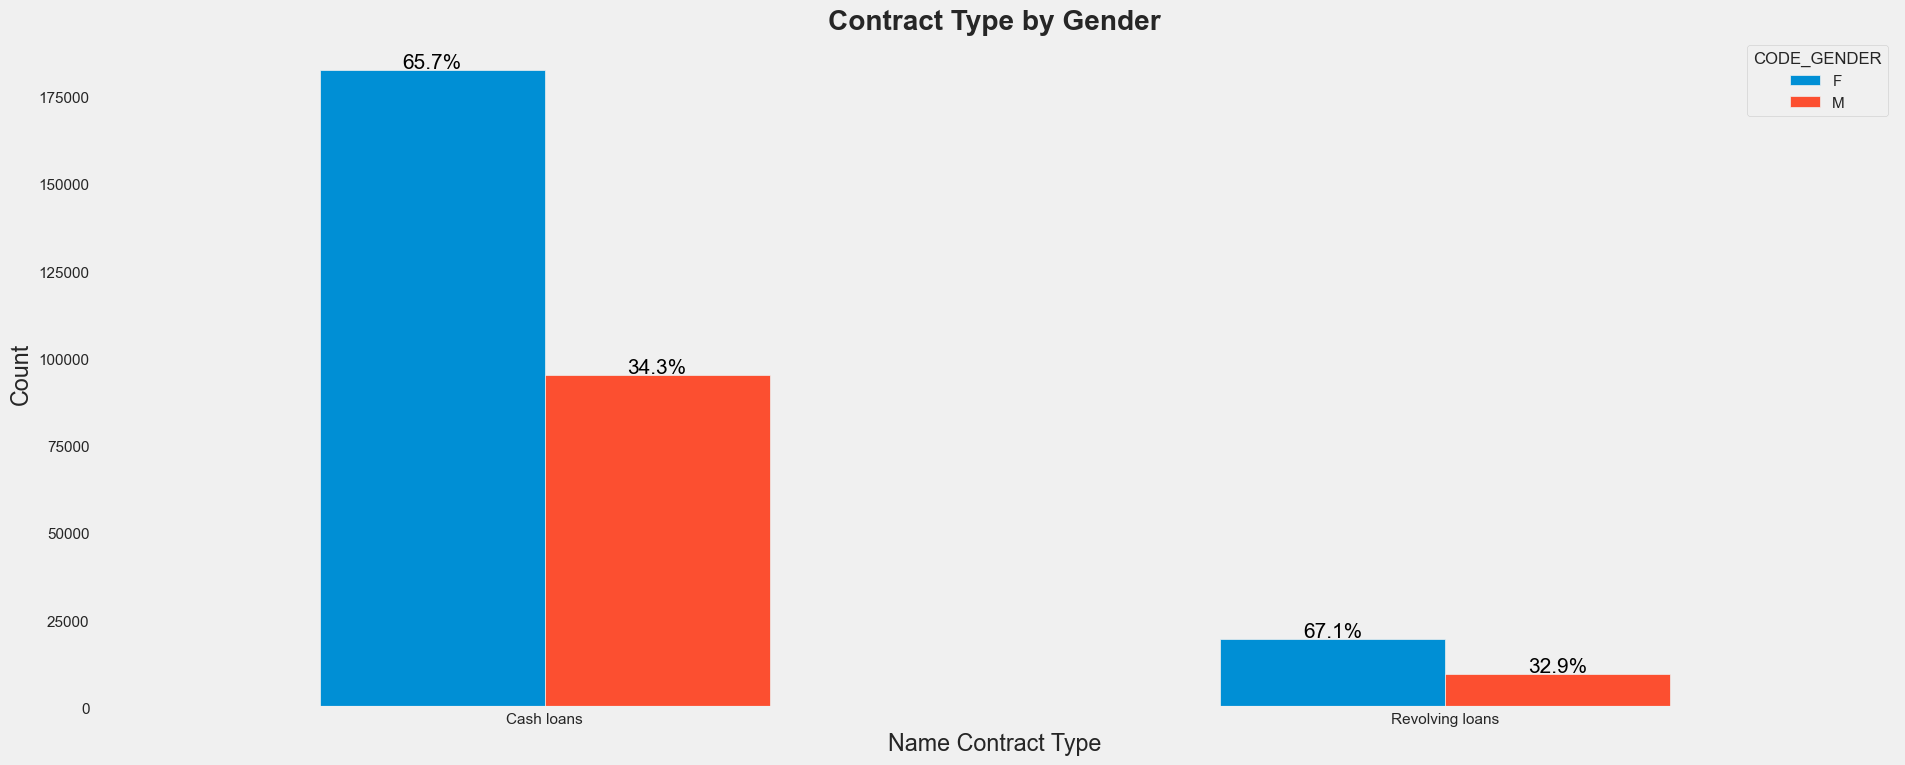

In [15]:
contract_gender= df.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).size().unstack()
axis= contract_gender.plot(kind='bar') #unstack the category

axis.set_xticklabels(axis.get_xticklabels(), rotation=0)

# add percentage 
for i, p in enumerate(axis.patches):
    total= contract_gender.sum(axis=1)
    axis.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                  textcoords='offset points')
    
plt.xlabel('Name Contract Type')
plt.ylabel('Count')
plt.title('Contract Type by Gender', weight= 'bold')
plt.grid(False)
plt.show()

### Target Description (Payment Status)

In [16]:
# Create new column to replace values using text description

status= {0: 'No Payment Difficulties', 1:'Payment Difficulties'}
df['TARGET_DESC']= df['TARGET'].replace(status)

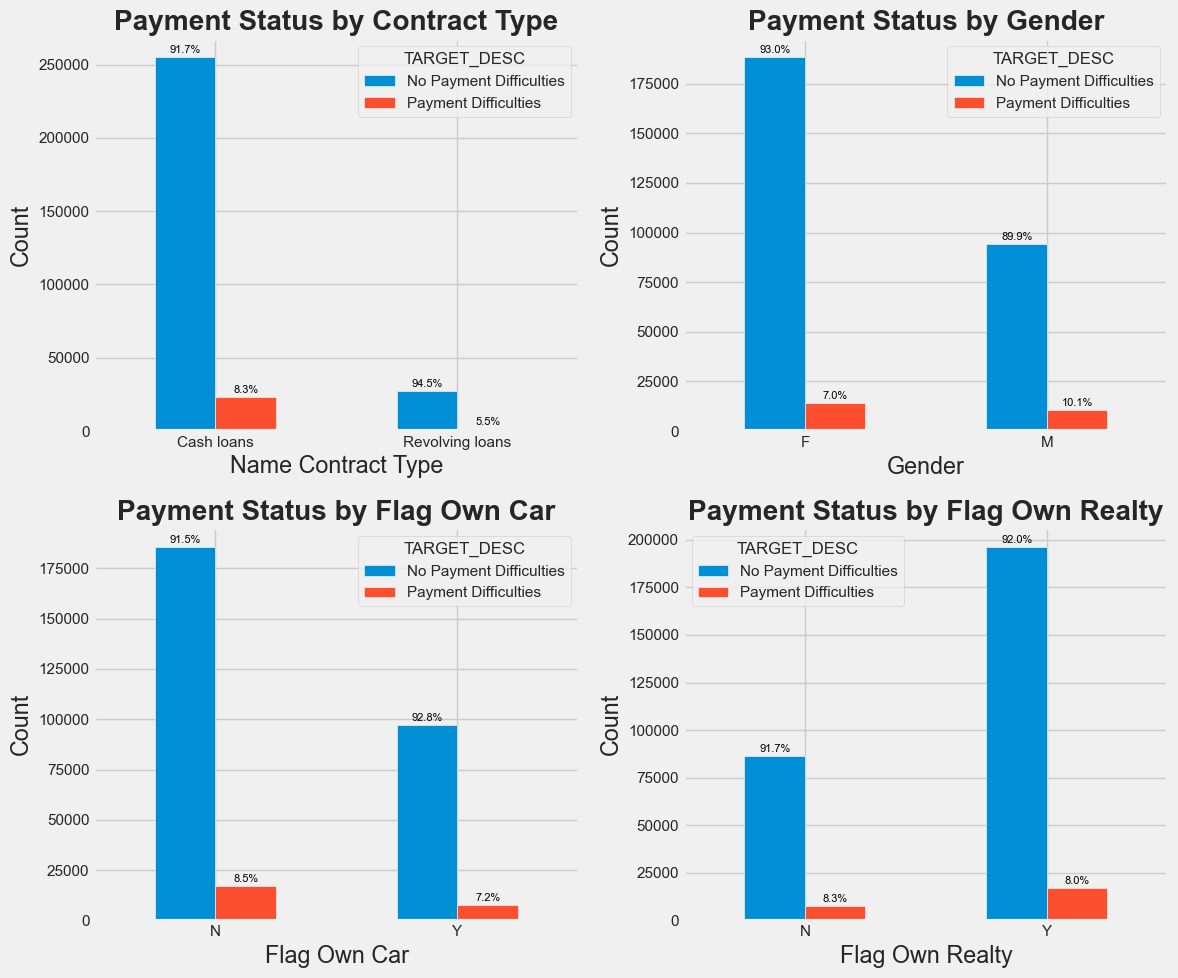

In [17]:
# Compare TARGET 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Target vs contract_type
target_contract = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET_DESC']).size().unstack()
axis1 = target_contract.plot(kind='bar', ax=axes[0, 0])  # Unstack the category
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0)
axis1.set_xlabel('Name Contract Type')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Contract Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis1.patches):
    total = target_contract.sum(axis=1)
    axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#--------------------------------------------------------------------------------------------------------

# Target vs code_gender
target_gender = df.groupby(['CODE_GENDER', 'TARGET_DESC']).size().unstack()
axis2 = target_gender.plot(kind='bar', ax=axes[0, 1])  # Unstack the category
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0)
axis2.set_xlabel('Gender')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Gender', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis2.patches):
    total = target_gender.sum(axis=1)
    axis2.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#---------------------------------------------------------------------------------------------------------

# Target vs flag_own_car
target_flag_car = df.groupby(['FLAG_OWN_CAR', 'TARGET_DESC']).size().unstack()
axis3 = target_flag_car.plot(kind='bar', ax=axes[1, 0])  # Unstack the category
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0)
axis3.set_xlabel('Flag Own Car')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Flag Own Car', weight='bold')

# add percentage labels
for i, p in enumerate(axis3.patches):
    total = target_flag_car.sum(axis=1)
    axis3.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#---------------------------------------------------------------------------------------------------------

# Target vs flag_own_realty
target_flag_realty = df.groupby(['FLAG_OWN_REALTY', 'TARGET_DESC']).size().unstack()
axis4 = target_flag_realty.plot(kind='bar', ax=axes[1, 1])  # Unstack the category
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0)
axis4.set_xlabel('Flag Own Realty')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Flag Own Realty', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis4.patches):
    total = target_flag_realty.sum(axis=1)
    axis4.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.tight_layout()
plt.show()

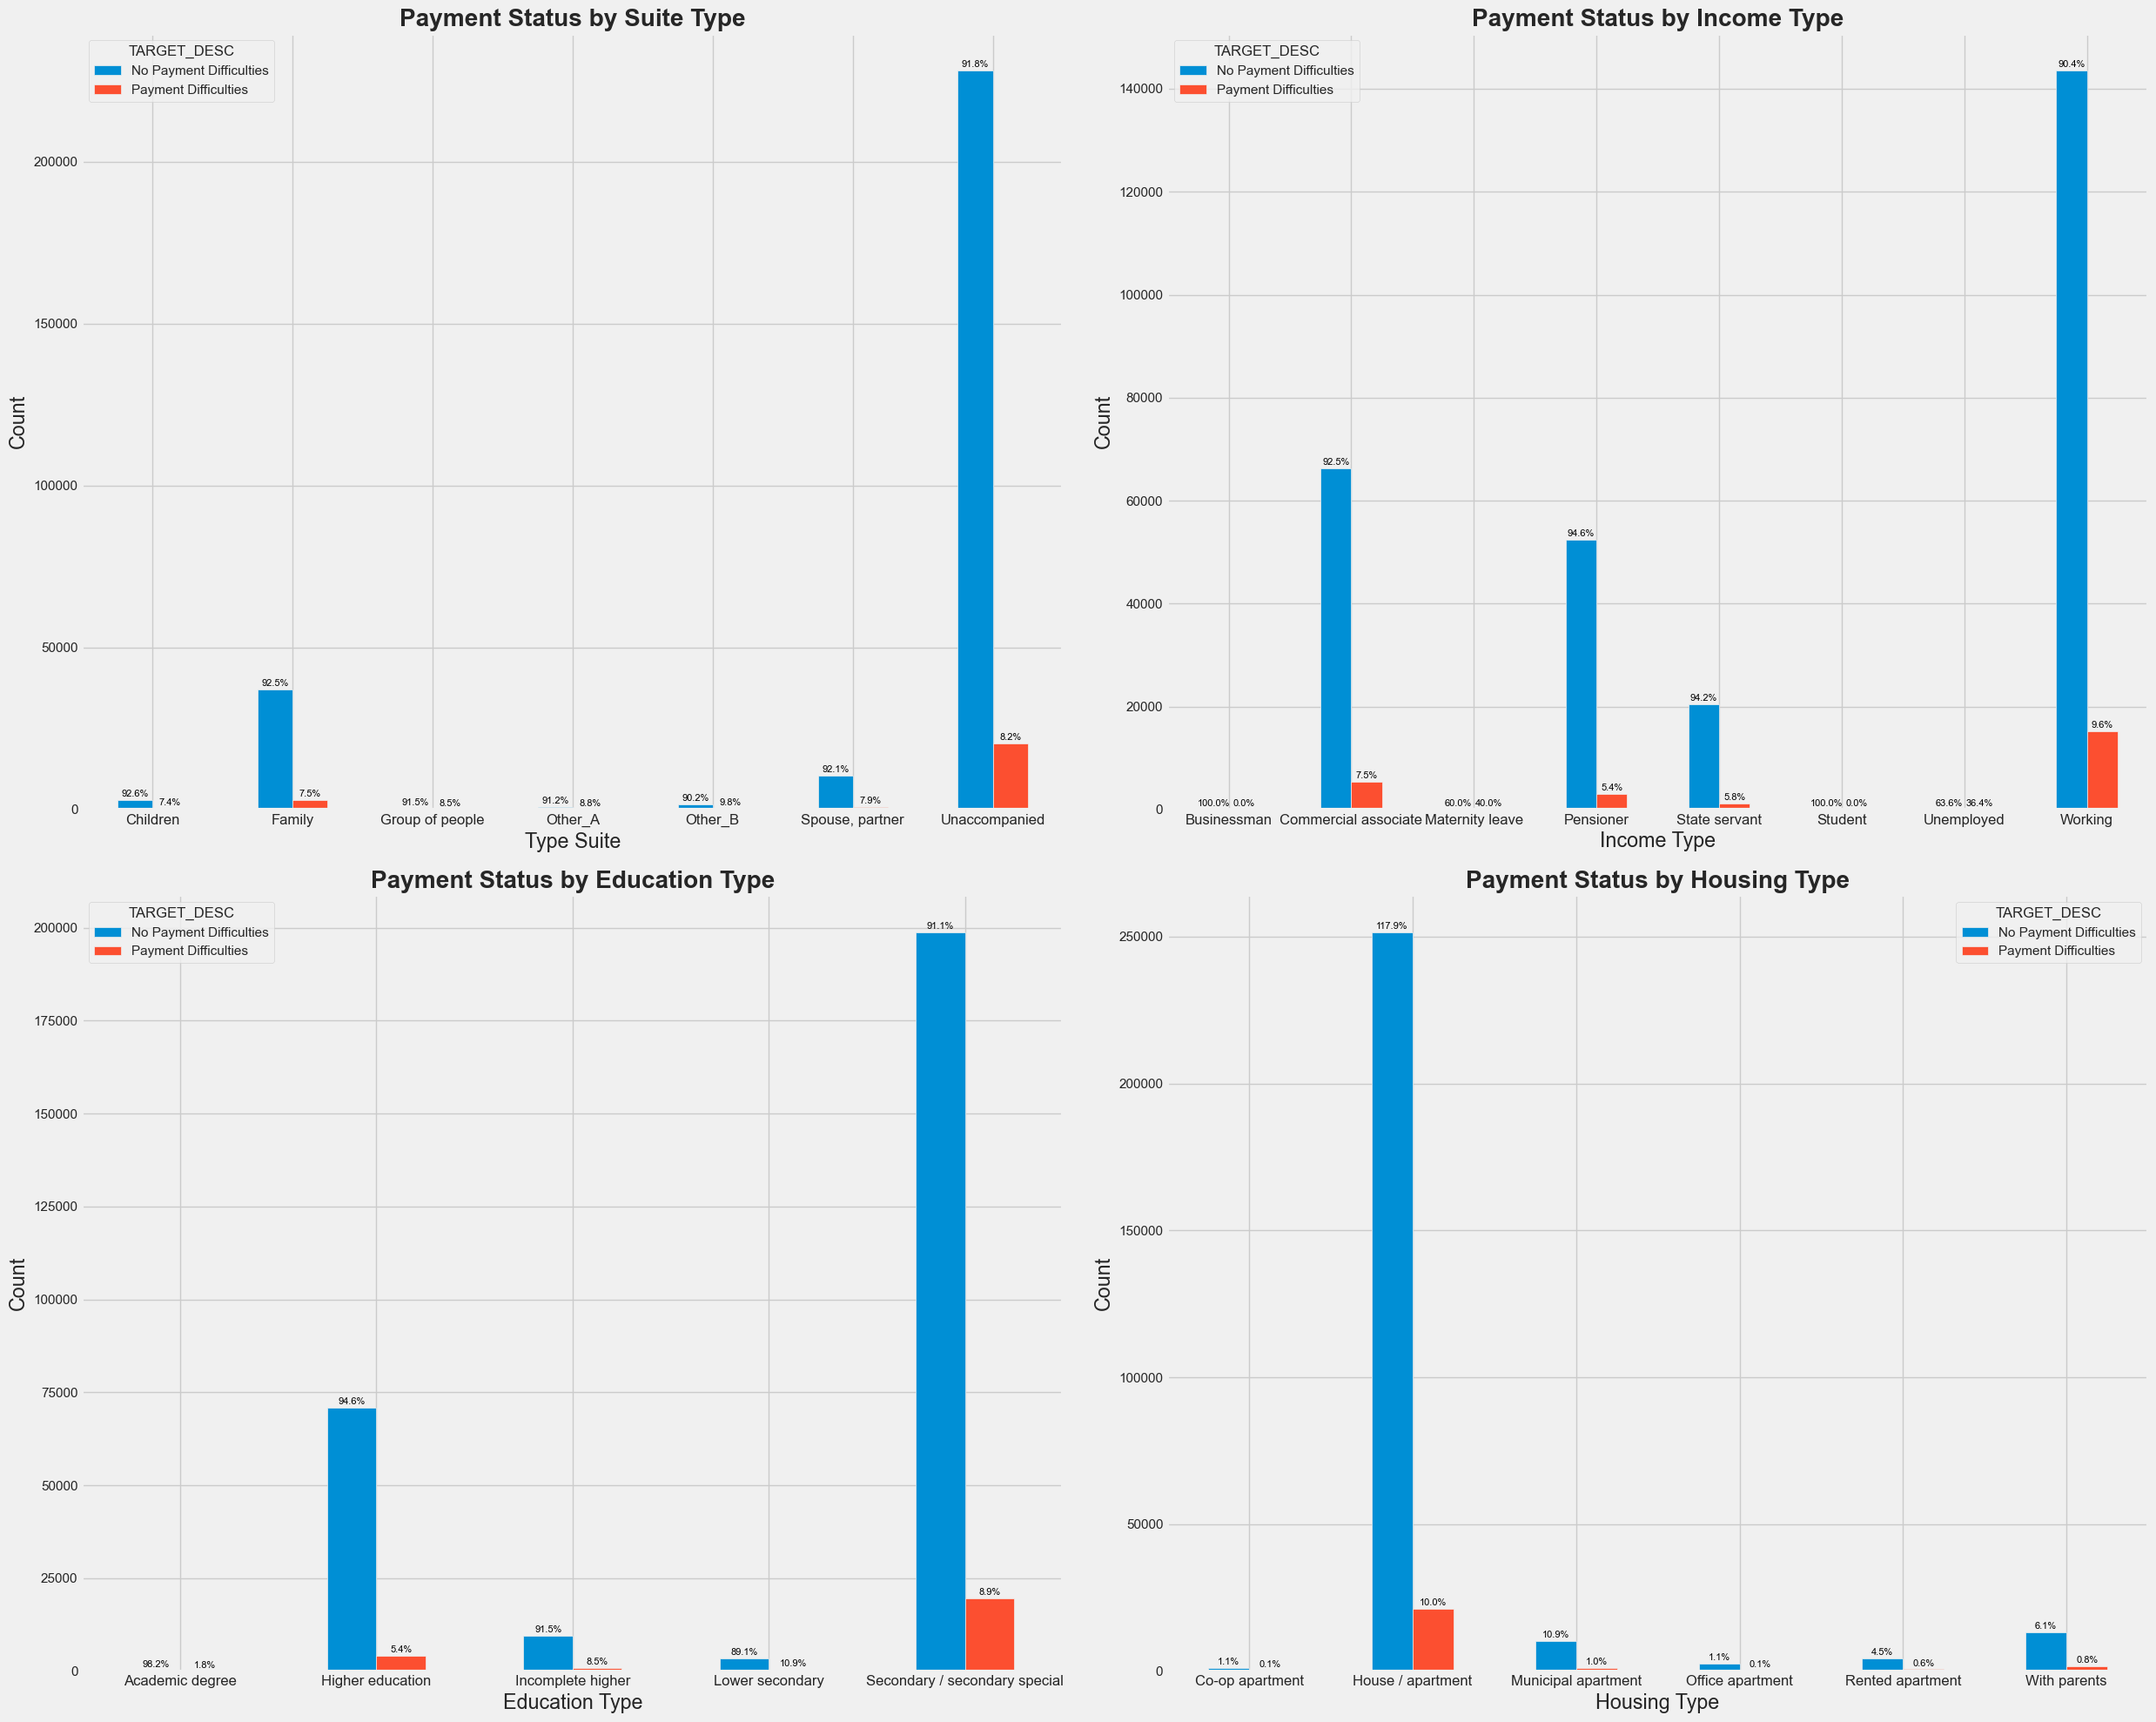

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

# Target vs name_type_suite
target_suite = df.groupby(['NAME_TYPE_SUITE', 'TARGET_DESC']).size().unstack()
axis1 = target_suite.plot(kind='bar', ax=axes[0, 0])  # Unstack the category
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0, fontsize=12)
axis1.set_xlabel('Type Suite')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Suite Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis1.patches):
    total = target_suite.sum(axis=1)
    axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#------------------------------------------------------------------------------------------------

# Target vs name_income_type
target_income = df.groupby(['NAME_INCOME_TYPE', 'TARGET_DESC']).size().unstack()
axis2 = target_income.plot(kind='bar', ax=axes[0, 1])  # Unstack the category
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0, fontsize= 12)
axis2.set_xlabel('Income Type')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Income Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis2.patches):
    total = target_income.sum(axis=1)
    axis2.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#------------------------------------------------------------------------------------------------

# Target vs name_education_type
target_education = df.groupby(['NAME_EDUCATION_TYPE', 'TARGET_DESC']).size().unstack()
axis3 = target_education.plot(kind='bar', ax=axes[1, 0])  # Unstack the category
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0, fontsize=12)
axis3.set_xlabel('Education Type')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Education Type', weight='bold')

# add percentage labels
for i, p in enumerate(axis3.patches):
    total = target_education.sum(axis=1)
    axis3.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#-----------------------------------------------------------------------------------------------

# Target vs name_housing_type
target_house = df.groupby(['NAME_HOUSING_TYPE', 'TARGET_DESC']).size().unstack()
axis4 = target_house.plot(kind='bar', ax=axes[1, 1])  # Unstack the category
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0, fontsize=12)
axis4.set_xlabel('Housing Type')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Housing Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis4.patches):
    total = target_flag_realty.sum(axis=1)
    axis4.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.tight_layout()
plt.show()


In [19]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

## Business Insight

1. Persentase clients yang memiliki permasalahan dalam pembayaran pinjaman ada sebanyak 8,1 % dari total peminjam.
2. Jenis contract yang ditawarkan ada 2 jenis, yaitu cash loans dan revolving loans dimana pada kedua jenis contract tersebut didominasi oleh wanita. Pada cash loans sebesar 65,7 % dan pada revolving loans sebesar 67,1 %.
3. Jenis contract yang paling diminati adalah cash loans, akan tetapi permasalahan pembayaran pada cash loans lebih besar daripada revolving loans.
4. Client wanita yang mengalami permasalahan pembayaran lebih sedikit dibandingkan dengan client pria, di mana persentase untuk wanita 7 % sedangkan pria 10,1 %.
5. Mayoritas clients yang mengalami kesulitan pembayaran tidak mempunyai mobil. Mayoritas clients yang mengalami kesulitan pembayaran mempunyai rumah atau flat. Perlu dicek lebih lanjut apakah itu orang yang sama.
6. Berdasarkan type suite, clients yang mengalami kesulitan pembayaran terbanyak adalah Unaccompanied.
7. berdasarkan income type, clients yang mengalami kesulitan pembayaran terbanyak adalah working, yang kemudian diikuti oleh commercial assosiate dan pensioner.
8. Berdasrkan jenis pendidikan, clients yang mengalami kesulitan pembayaran terbanyak adalah Secondary/secondary special.
9. Berdasarkan housing type, clients yang mengalami kesulitan pembayaran terbanyak adalah yang memiliki house/apartment.

## Data Preprocessing

### Check duplicate

In [20]:
df.duplicated().any()

False

### Remove Irrelevant Feature and Handling Missing Value

In [21]:
df_copy= df.copy()

In [22]:
df_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_DESC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Payment Difficulties
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No Payment Difficulties
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No Payment Difficulties
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No Payment Difficulties
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No Payment Difficulties


In [23]:
df_copy.drop(['SK_ID_CURR'], inplace= True,axis=1)
df_copy.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_DESC
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Payment Difficulties
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No Payment Difficulties
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No Payment Difficulties
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No Payment Difficulties
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No Payment Difficulties


In [24]:
num_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
              'EXT_SOURCE_3','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
df_copy[num_columns]= df_copy[num_columns].fillna(value= df_copy[num_columns].median())

In [25]:
cat= df_copy.select_dtypes(exclude= 'number').columns.tolist()
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'TARGET_DESC']

In [26]:
df_copy[cat]= df_copy[cat].apply(LabelEncoder().fit_transform)
df_copy.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_DESC
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
# create new column to calc client age
df_copy['AGE']= (df_copy['DAYS_BIRTH']/365).astype(int)

age_category= []
for i in df_copy['AGE']:
    if i <=35:
        age_category.append('Early Adult')
    elif i <=45:
        age_category.append('Adult')
    else:
        age_category.append('Older')

In [28]:
df_copy= df_copy.dropna()

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152825 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        152825 non-null  int64  
 1   NAME_CONTRACT_TYPE            152825 non-null  int32  
 2   CODE_GENDER                   152825 non-null  int32  
 3   FLAG_OWN_CAR                  152825 non-null  int32  
 4   FLAG_OWN_REALTY               152825 non-null  int32  
 5   CNT_CHILDREN                  152825 non-null  int64  
 6   AMT_INCOME_TOTAL              152825 non-null  float64
 7   AMT_CREDIT                    152825 non-null  float64
 8   AMT_ANNUITY                   152825 non-null  float64
 9   AMT_GOODS_PRICE               152825 non-null  float64
 10  NAME_TYPE_SUITE               152825 non-null  int32  
 11  NAME_INCOME_TYPE              152825 non-null  int32  
 12  NAME_EDUCATION_TYPE           152825 non-null  in

## Feature Selection

In [30]:
X= df_copy.drop(['TARGET'], axis=1)
y= df_copy['TARGET']

In [31]:
features_selected= SelectKBest(score_func= chi2, k=15)
fit= features_selected.fit(X,y)
df_scores= pd.DataFrame(fit.scores_)
df_pvalues= pd.DataFrame(fit.pvalues_)
df_columns= pd.DataFrame(X.columns)

feature_scores= pd.concat([df_columns, df_scores, df_pvalues], axis=1)
feature_scores.columns= ['Features', 'Score', 'P-Value']

print('The features that correlate well with target feature:\n')
feature_scores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score,P-Value
16,DAYS_EMPLOYED,7.190080e+07,0.000000e+00
8,AMT_GOODS_PRICE,5.190123e+07,0.000000e+00
6,AMT_CREDIT,3.190966e+07,0.000000e+00
15,DAYS_BIRTH,8.874080e+05,0.000000e+00
17,DAYS_REGISTRATION,4.024510e+05,0.000000e+00
5,AMT_INCOME_TOTAL,3.516040e+05,0.000000e+00
7,AMT_ANNUITY,3.156516e+05,0.000000e+00
18,DAYS_ID_PUBLISH,2.754215e+05,0.000000e+00
52,DAYS_LAST_PHONE_CHANGE,1.966394e+05,0.000000e+00
79,TARGET_DESC,1.421620e+05,0.000000e+00


In [32]:
# Choose the features that have p-values < 0.05
feature_fix= feature_scores[feature_scores['P-Value'] < 0.05]
features= feature_fix['Features'].to_list()

number_features= len(features)
print(f'the number of important features = {number_features}')
features

the number of important features = 51


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',

## Oversampling

In [33]:
X= df_copy[features]

In [34]:
X['TARGET_DESC'].value_counts()

TARGET_DESC
0    142162
1     10663
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

TARGET
1    142162
0    142162
Name: count, dtype: int64


In [36]:
# Drop kolom DAYS_BIRTH dan TARGET_DESC pada X_res
X_res = X_res.drop(columns = ['DAYS_BIRTH', 'TARGET_DESC'])

## Split data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)

logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.63      0.59     28358
           1       0.58      0.52      0.55     28507

    accuracy                           0.57     56865
   macro avg       0.58      0.57      0.57     56865
weighted avg       0.58      0.57      0.57     56865



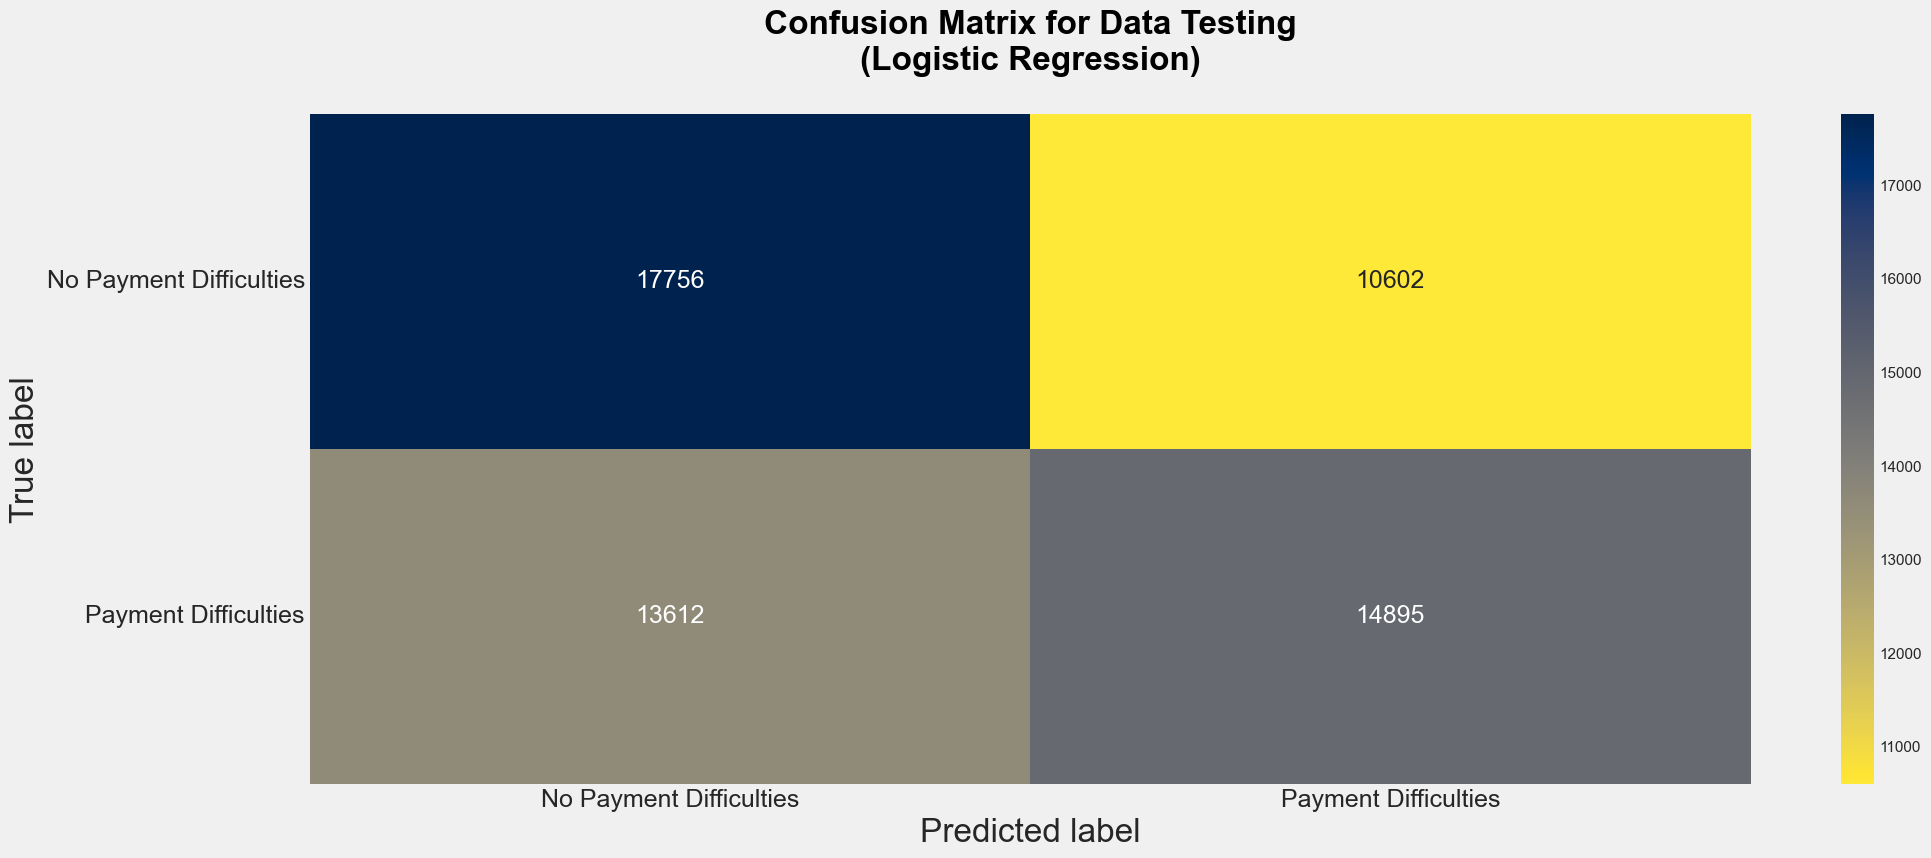

In [39]:
# Confusion matrix
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_pred_lr)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 18}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=18)

plt.title('Confusion Matrix for Data Testing\n(Logistic Regression)\n', fontsize=24, color='black', weight='bold')
plt.ylabel('True label', fontsize=24)
plt.xlabel('Predicted label', fontsize=24)
plt.show()

In [40]:
roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr),5)
print('ROC AUC:', roc_auc_lr)

ROC AUC: 0.57432


## K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     28358
           1       0.77      0.96      0.86     28507

    accuracy                           0.84     56865
   macro avg       0.86      0.84      0.84     56865
weighted avg       0.86      0.84      0.84     56865



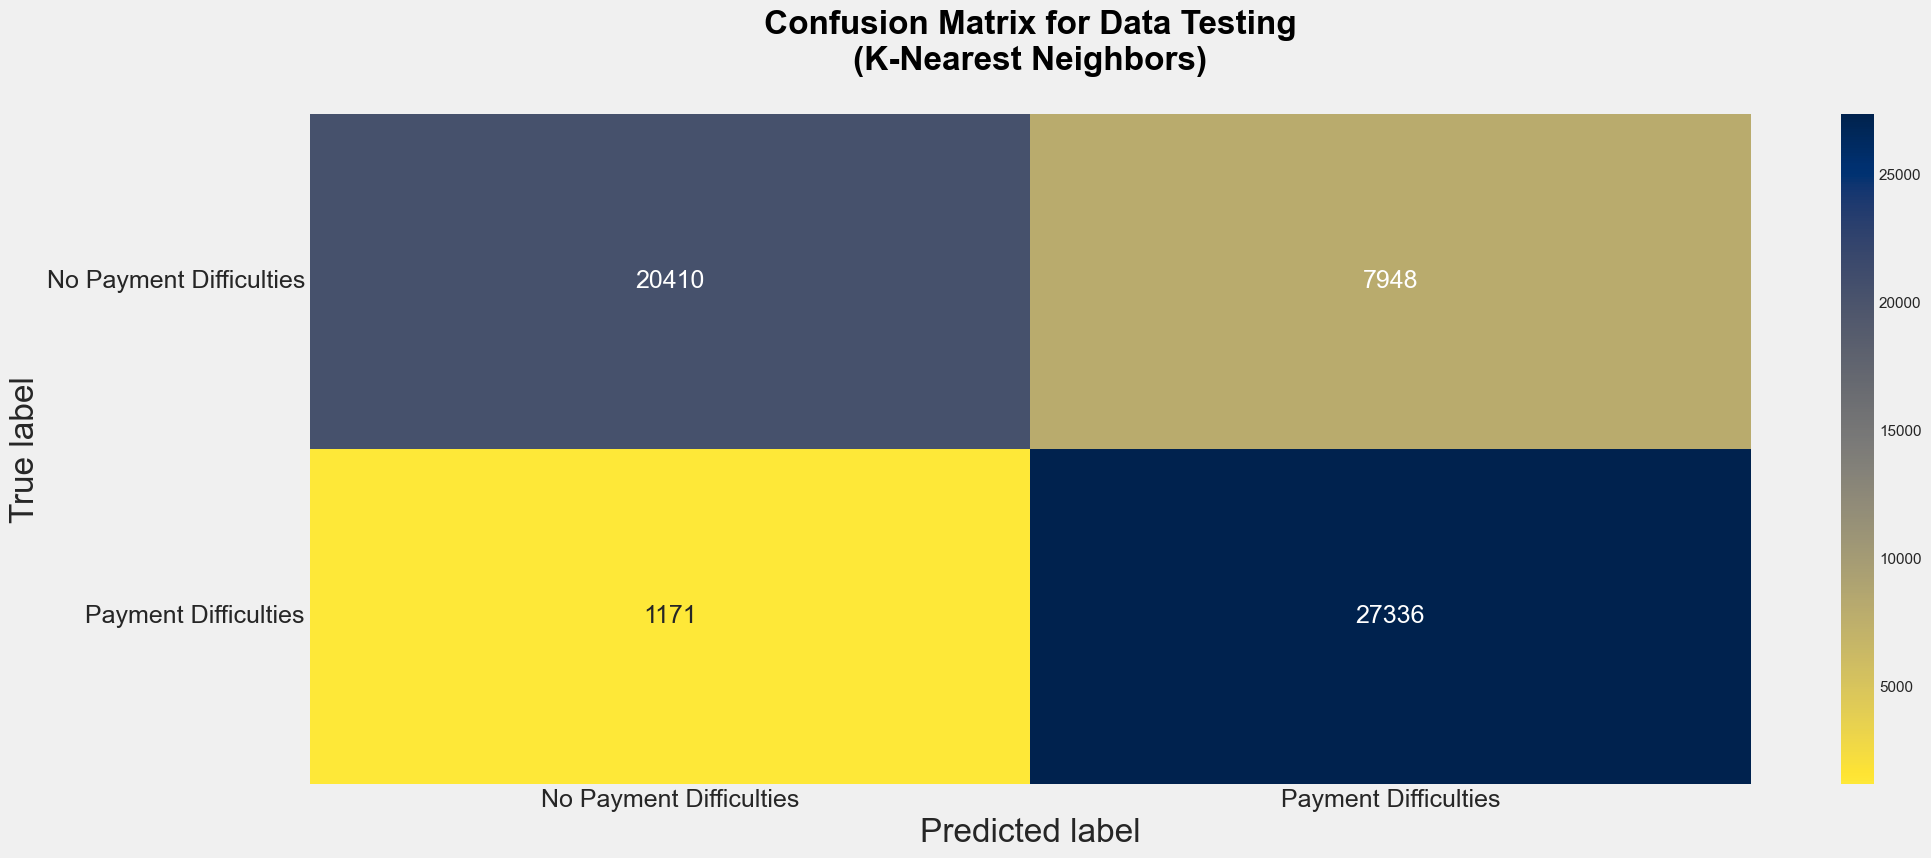

In [42]:
# Confusion matrix
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 18}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=18)

plt.title('Confusion Matrix for Data Testing\n(K-Nearest Neighbors)\n', fontsize=24, color='black', weight='bold')
plt.ylabel('True label', fontsize=24)
plt.xlabel('Predicted label', fontsize=24)
plt.show()

In [43]:
roc_auc_knn = round(roc_auc_score(y_test, y_pred_knn),5)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.83932


## Random Forest

In [44]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
  
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     28358
           1       0.99      0.92      0.95     28507

    accuracy                           0.95     56865
   macro avg       0.96      0.95      0.95     56865
weighted avg       0.96      0.95      0.95     56865



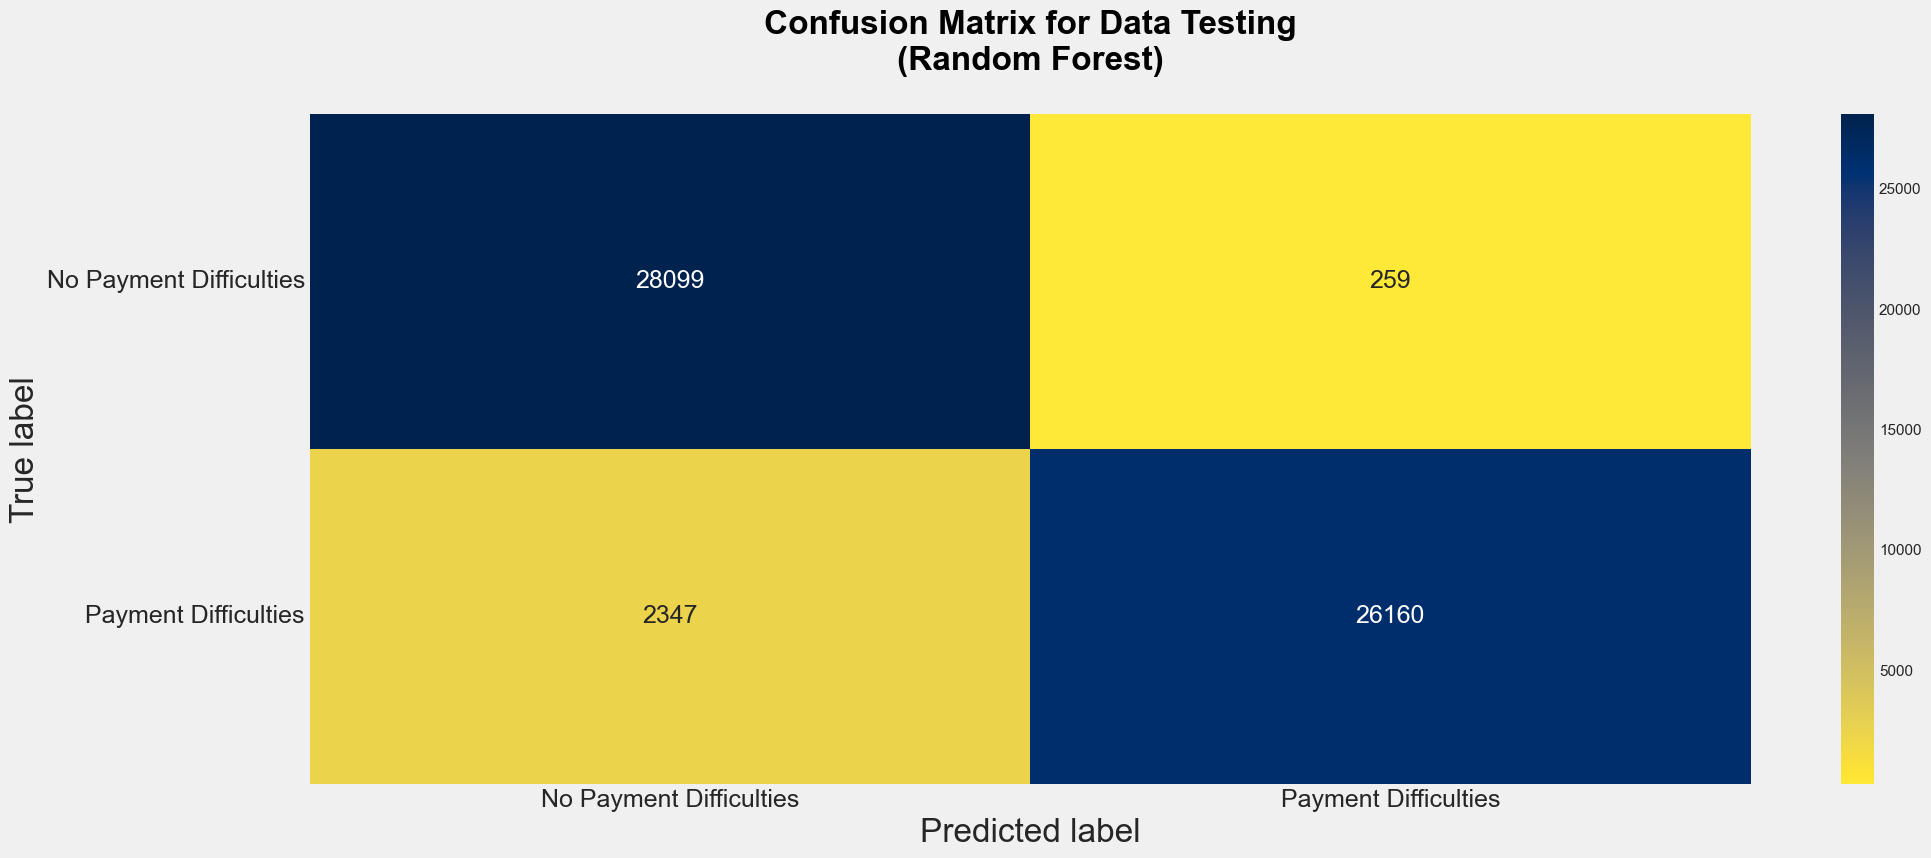

In [45]:
# Confusion matrix
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 18}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=18)

plt.title('Confusion Matrix for Data Testing\n(Random Forest)\n', fontsize=24, color='black', weight='bold')
plt.ylabel('True label', fontsize=24)
plt.xlabel('Predicted label', fontsize=24)
plt.show()

In [47]:
roc_auc_rf = round(roc_auc_score(y_test, y_pred_rf),5)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.95427
